## Exploratorty Data Analysis on Titanic dataset

In [43]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing dataset

In [44]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
#total number of rows and columns
titanic.shape

(891, 15)

Insights - There are total 891 rows and 15 columns in the given dataset

In [65]:
#columns in the given dataset
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## Getting General info of data

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Insights - Dataset contains bool,category,float,int,object datatype

## Statistical Description of data

In [48]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking missing value

In [49]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Insights - There are total 177 data misisng in age column and 2 data in embarked column and 688 data in deck and 2 data in embark_town column 

<Axes: >

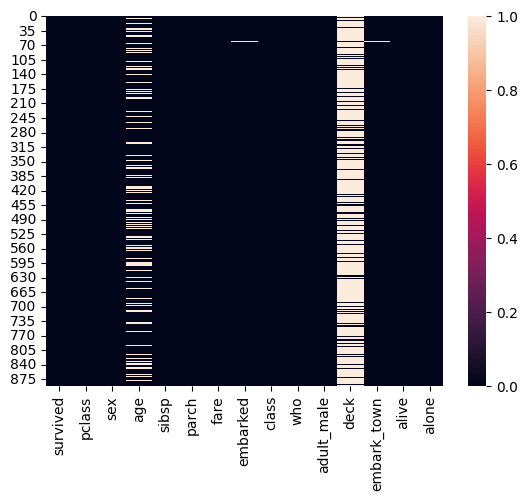

In [50]:
#visualizing the missing data 
sns.heatmap(titanic.isnull())

## Handling Missing value

In [51]:

#mean value imputation in age column missing value

age_mean = titanic['age'].mean()
titanic['age'] = titanic['age'].fillna(age_mean)

#deleting the row from embark_town and embarked that conatin non-value

titanic.dropna(subset=['embark_town','embarked'], inplace=True)



In [54]:
#deleting the deck column

titanic = titanic.drop('deck' , axis=1)

<Axes: >

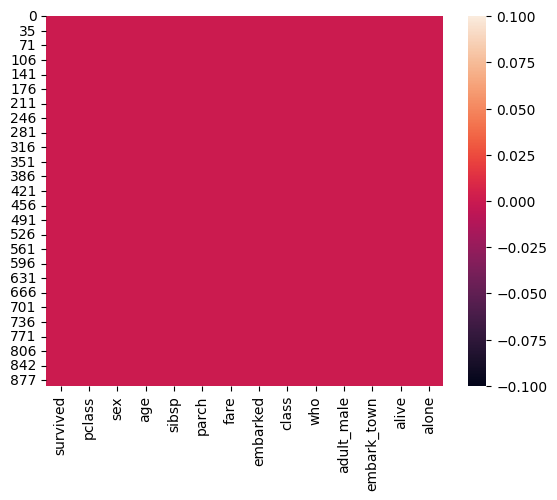

In [55]:
sns.heatmap(titanic.isnull())

In [56]:
#now cheking the missing value in dataset
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Insights - Now dataset have zero Missing value

## Check the unique values in the columns

In [58]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           247
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

In [59]:
titanic['embark_town'].unique()


array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [60]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

## Seperating numberical and categorical columns

In [71]:
numerical_col = []
categorical_col = []

for i in titanic.columns:
    if titanic[i].dtype != 'O':
        numerical_col.append(i)
    else:
        categorical_col.append(i)

print("numerical columns are ", numerical_col)
print("categorical columns are ", categorical_col)

numerical columns are  ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'adult_male', 'alone']
categorical columns are  ['sex', 'embarked', 'who', 'embark_town', 'alive']


## Visualizing the dataset

<BarContainer object of 889 artists>

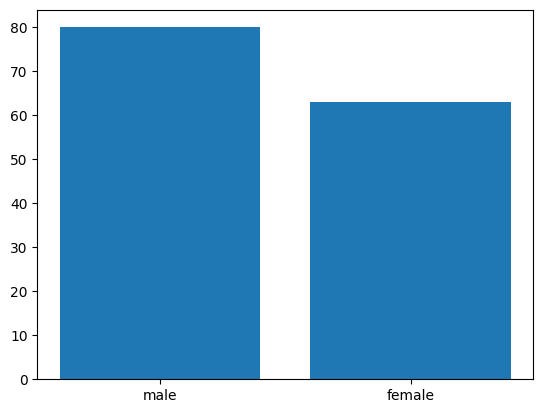

In [77]:
plt.bar(titanic['sex'] , titanic['age'])

<BarContainer object of 889 artists>

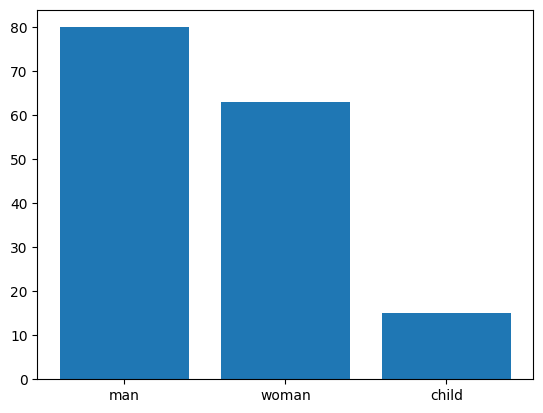

In [78]:
plt.bar(titanic['who'] , titanic['age'])

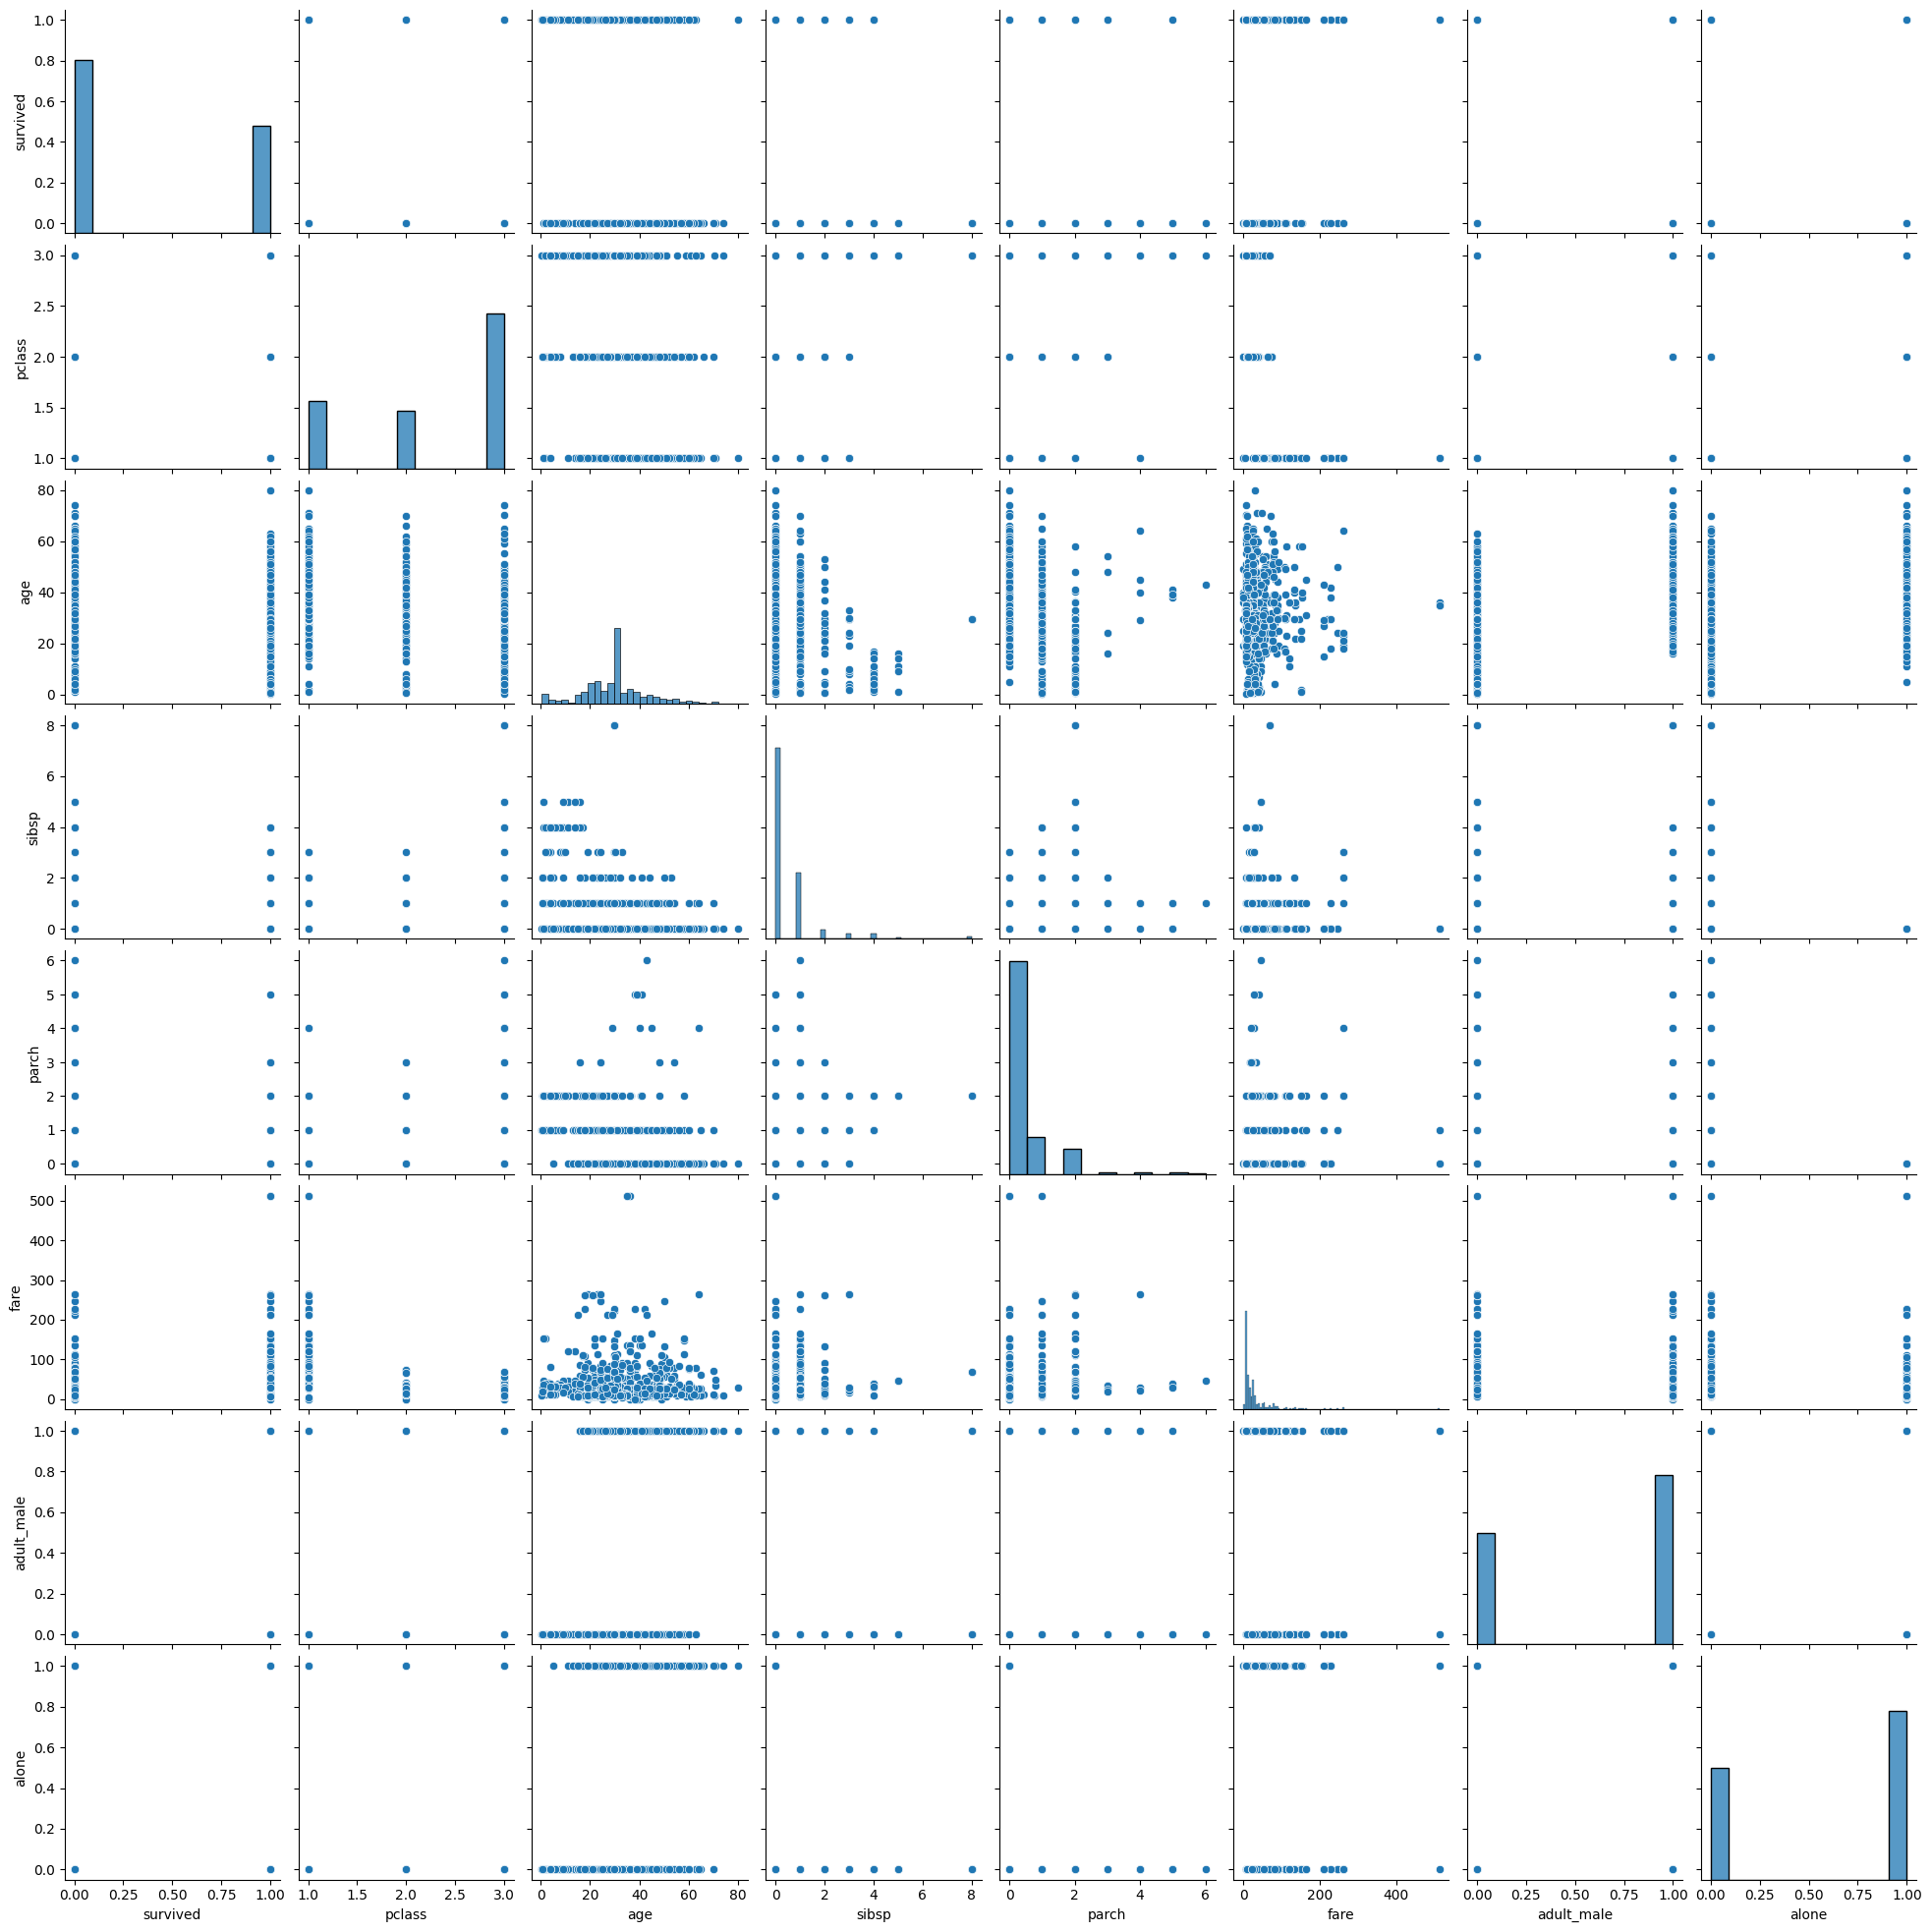

In [85]:
sns.pairplot(titanic)